<a href="https://colab.research.google.com/github/preethamsai696/SmartKnower-Projects-/blob/master/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud,STOPWORDS

In [102]:
df = pd.read_csv('IMDB Dataset.csv',usecols=['review','sentiment'])

In [103]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [104]:
df.shape

(61184, 2)

In [105]:
text = " ".join(df['review'].str.lower())
custom_m = np.array(Image.open('1.jpg'))

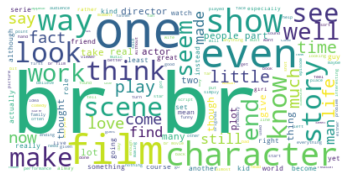

In [106]:
wc = WordCloud(background_color='white',max_words=400,stopwords=STOPWORDS,max_font_size=100)
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

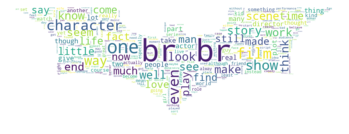

In [107]:
wc = WordCloud(background_color='white', max_words=400, stopwords=STOPWORDS, max_font_size=100, mask = custom_m)
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [108]:
x = df.iloc[:,0].values
y = df['sentiment'].values

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8724122902593158
[[8247  919]
 [1423 7767]]
              precision    recall  f1-score   support

    negative       0.85      0.90      0.88      9166
    positive       0.89      0.85      0.87      9190

    accuracy                           0.87     18356
   macro avg       0.87      0.87      0.87     18356
weighted avg       0.87      0.87      0.87     18356



In [112]:
!pip install streamlit
!pip install pyngrok

In [113]:
%%writefile maj-imdb.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

st.title(" Machine Learning Major Project ")
st.subheader(" IMDB Review DataSet ")

data = pd.read_csv('IMDB Dataset.csv',usecols=['review','sentiment'])

x1 = data.iloc[:,0].values
y1  =data['sentiment'].values

sentence = st.text_input(" Write your review here : ")

model1 = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])
model1.fit(x1,y1)

if sentence:
  y_pred = model1.predict([sentence])
  st.write(y_pred)

Overwriting maj-imdb.py


In [114]:
from pyngrok import ngrok
ngrok.connect(port='8501')

'http://6429f7f18b53.ngrok.io'

In [115]:
!streamlit run maj-imdb.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.224.209.121:8501

  Stopping...
  Stopping...
